<a href="https://colab.research.google.com/github/Keerthana1414/Student-Placement-Prediction/blob/main/Student_Placement_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding the Data**

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
df=pd.read_csv('/drive/My Drive/Datasets/Placement_Data.csv')

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [6]:
df.shape

(215, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
df['ssc_p'].mean()

67.30339534883721

In [9]:
df['ssc_p'].max()

89.4

In [10]:
df[df['ssc_p']==df['ssc_p'].max()].shape[0]

1

Another way to count number of students got maximum marks in ssc_p

In [11]:
len(df[df['ssc_p']==df['ssc_p'].max()])

1

In [12]:
df[df['ssc_p']==df['ssc_p'].max()]['status']

145    Placed
Name: status, dtype: object

In [13]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [14]:
df['degree_t'][df['status']=='Placed'].value_counts().head(1)

Comm&Mgmt    102
Name: degree_t, dtype: int64

In [15]:
# nunique gives counts

df['degree_t'].nunique()

3

In [16]:
# unique gives values

df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [17]:
# Correlation between ssc_p & hsc_p

df[['ssc_p','hsc_p']].corr()

,ssc_p,hsc_p
ssc_p,1.000000,0.511472
hsc_p,0.511472,1.000000


In [18]:
# Correlation 

df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


# **Data Preprocessing**

In [19]:
# df=df.drop(columns=['sl_no'], inplace=True) - don't use it when your dataset is huge.

df.drop(columns=['sl_no'], inplace=True)

In [20]:
# Checking for null values

df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [21]:
# Replacing null value with zero

df['salary'].fillna(0,inplace=True)

df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# **Data Visualization**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Scatter plot between 10th and 12th percentage')

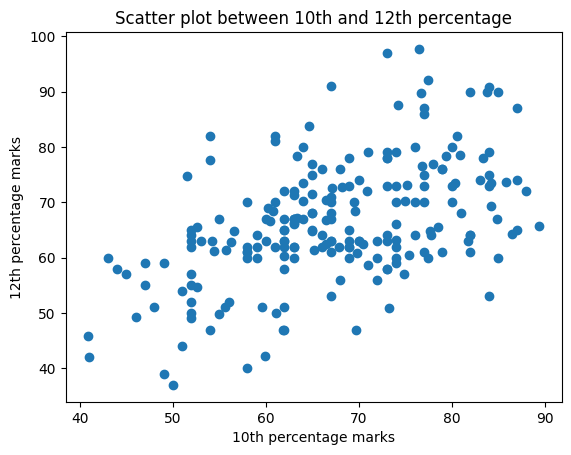

In [23]:
# Scatter Plot

plt.scatter(df['ssc_p'], df['hsc_p']) # plotting scatter plot
plt.xlabel('10th percentage marks') # label x-axis
plt.ylabel('12th percentage marks') # labelling y-axis
plt.title('Scatter plot between 10th and 12th percentage') # Giving title

Draw the scatter plot between 10th and 12th percentage grouped on their placement status.

In [24]:
colors = {'Placed' : 'tab:blue', 'Not Placed' : 'tab:red'}

In [25]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

Text(0.5, 1.0, 'Scatter plot between 10th and 12th percentage')

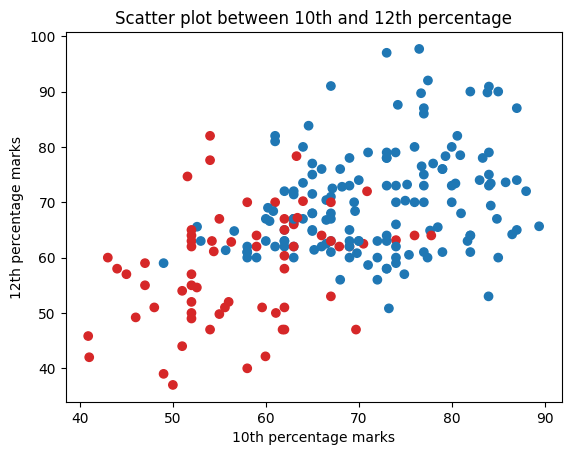

In [26]:
plt.scatter(df['ssc_p'], df['hsc_p'], c=df['status'].map(colors)) # plotting scatter plot
plt.xlabel('10th percentage marks') # label x-axis
plt.ylabel('12th percentage marks') # labelling y-axis
plt.title('Scatter plot between 10th and 12th percentage')

Draw pairplots between continuous columns.
pairplot - making scatter plots between all continuous columns.

In [27]:
#sns.pairplot(df)

In [28]:
#sns.pairplot(df, hue='status')

Kernel density estimate - appropriate distribution

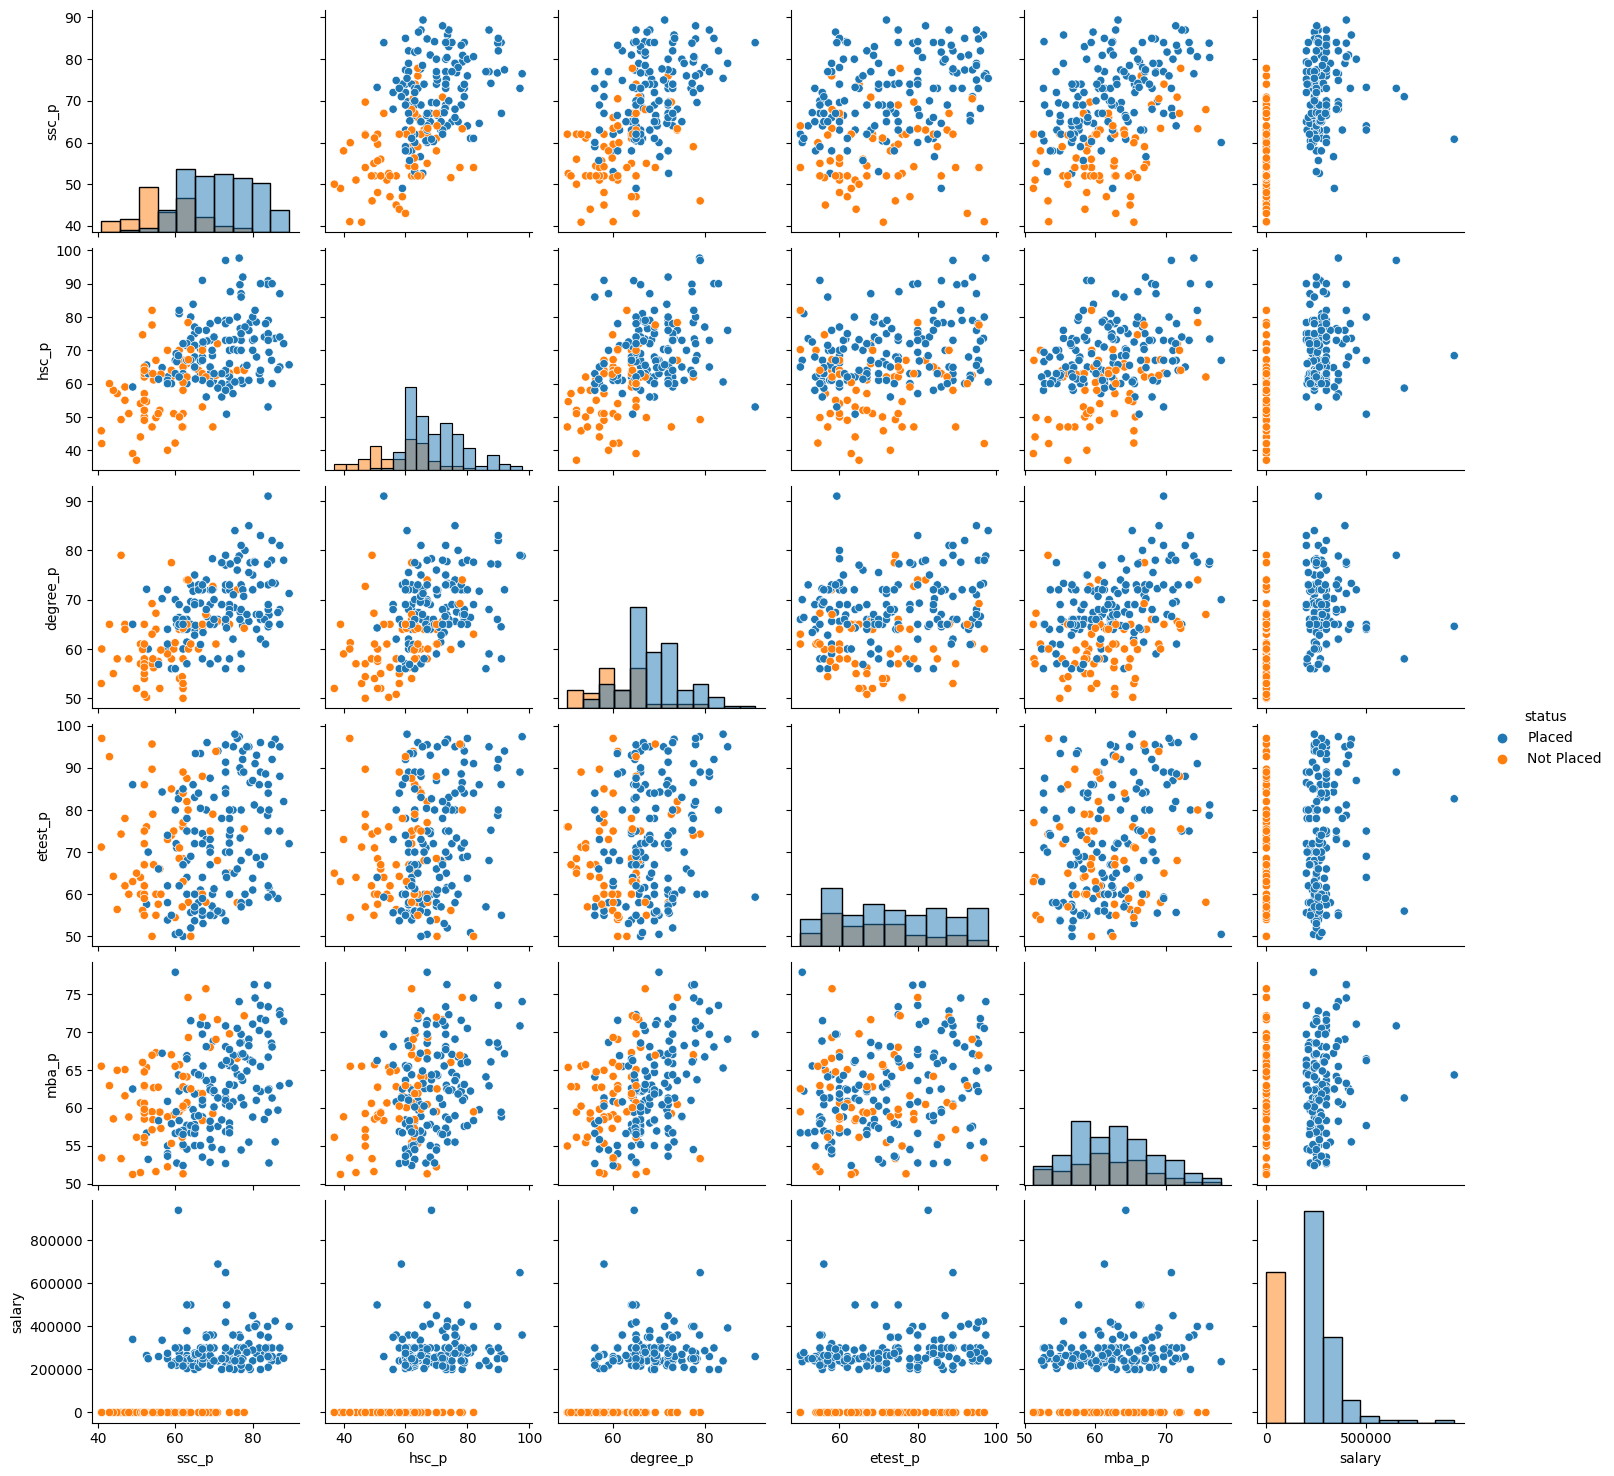

In [29]:
sns.pairplot(df, hue='status',diag_kind='hist')

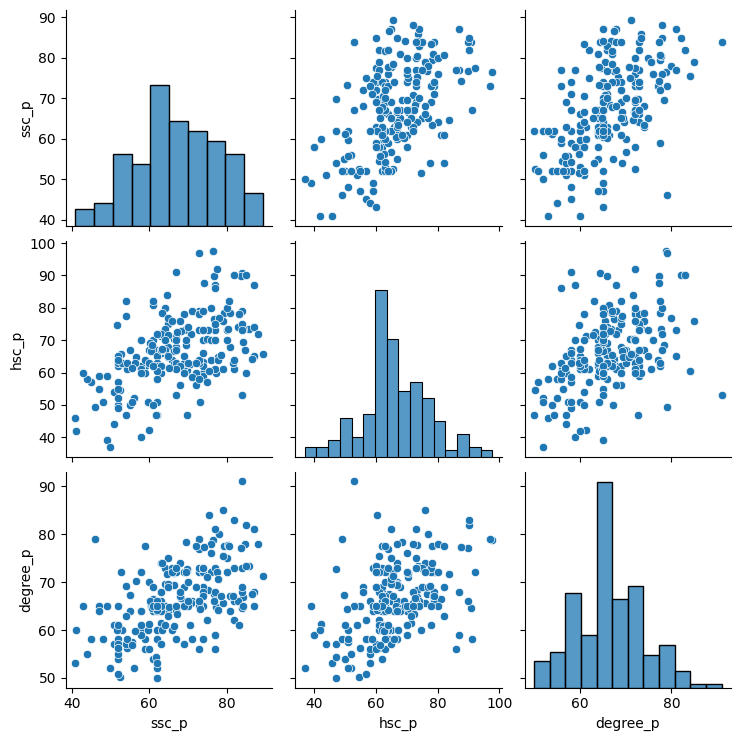

In [30]:
sns.pairplot(df[['ssc_p', 'hsc_p', 'degree_p']])

<Axes: ylabel='ssc_p'>

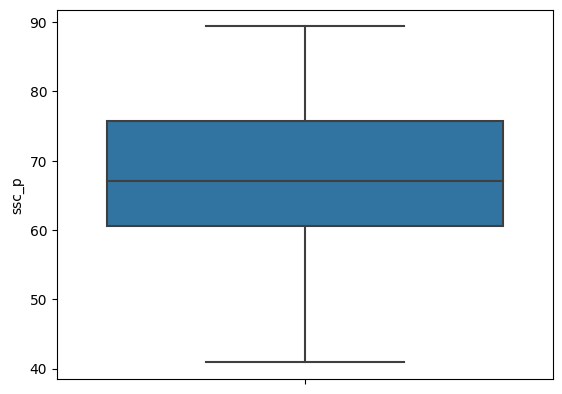

In [31]:
sns.boxplot(y='ssc_p',data=df)

<Axes: ylabel='hsc_p'>

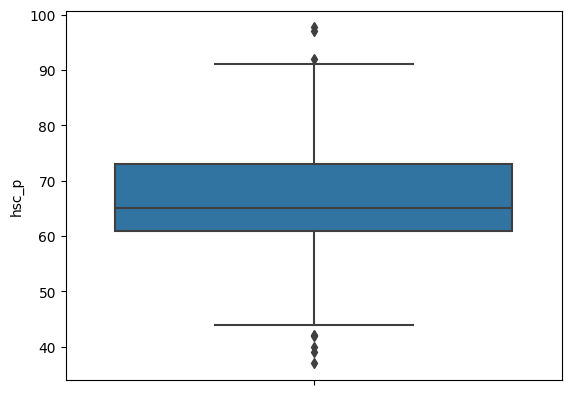

In [32]:
sns.boxplot(y='hsc_p',data=df)

<Axes: xlabel='status', ylabel='hsc_p'>

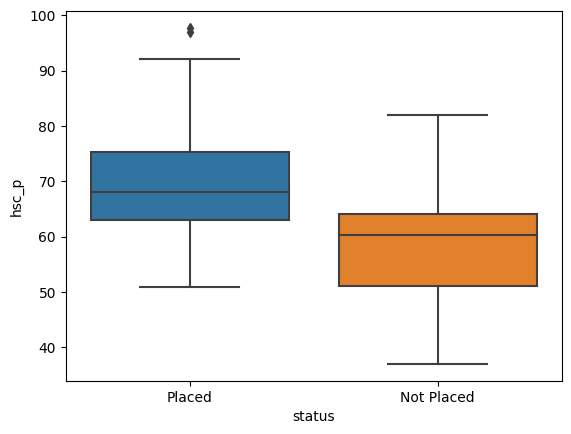

In [33]:
sns.boxplot(y='hsc_p',data=df, x='status')

Lineplots

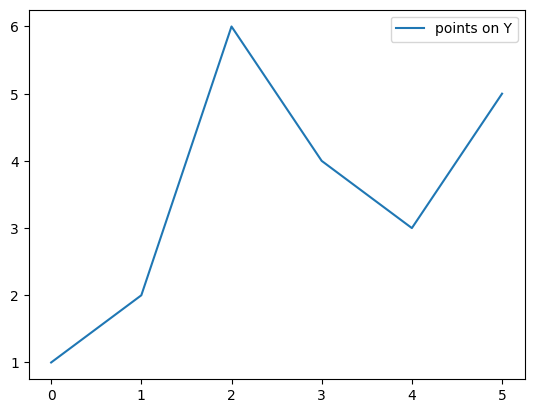

In [34]:
y=[1,2,6,4,3,5]
plt.plot(y, label='points on Y')
plt.legend()
# Order matters in Lineplots

Heatmap

<Axes: >

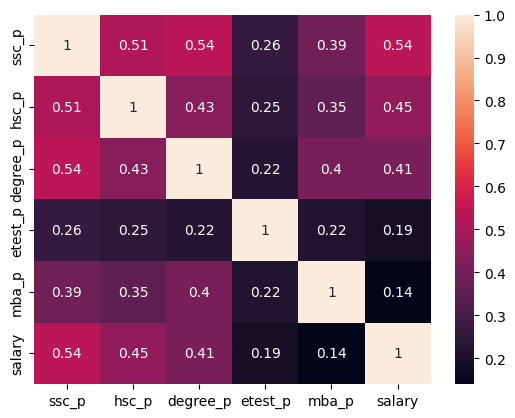

In [36]:
sns.heatmap(df.corr(), annot=True)

Histogram

(array([67.,  0., 94., 38., 10.,  3.,  1.,  1.,  0.,  1.]),
 array([     0.,  94000., 188000., 282000., 376000., 470000., 564000.,
        658000., 752000., 846000., 940000.]),
 <BarContainer object of 10 artists>)

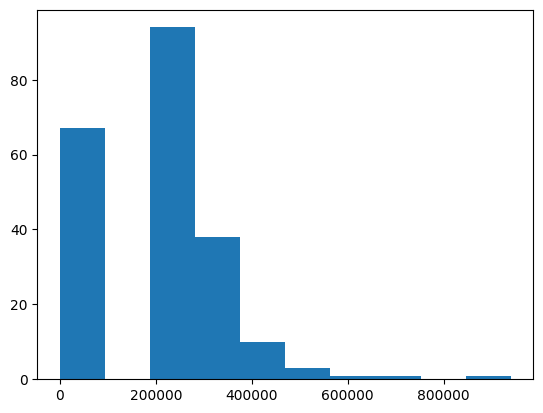

In [37]:
plt.hist(df['salary'])

KDE - Kernel Density Estimate

<Axes: xlabel='ssc_p', ylabel='Density'>

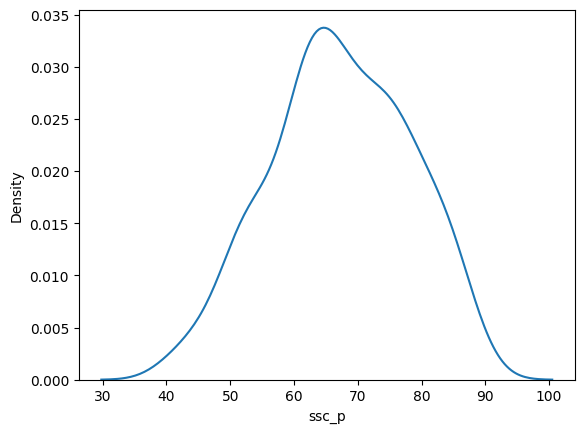

In [38]:
sns.kdeplot(df['ssc_p'])

# **Outlier Analysis**

<Axes: ylabel='degree_p'>

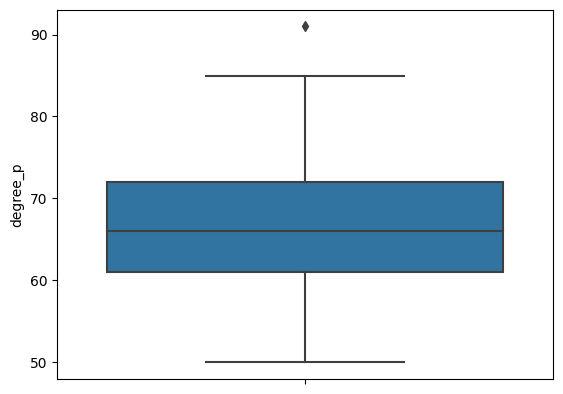

In [39]:
sns.boxplot(y='degree_p', data=df)

In [40]:
Q1 = df['degree_p'].quantile(q=0.25)
Q1

61.0

In [41]:
Q3 = df['degree_p'].quantile(q=0.75)
Q3

72.0

In [42]:
IQR = Q3-Q1
IQR 

11.0

In [43]:
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

In [44]:
upper_limit

88.5

In [45]:
lower_limit

44.5

In [46]:
df=df[(df['degree_p']<=upper_limit) & (df['degree_p']>=lower_limit)]

<Axes: ylabel='degree_p'>

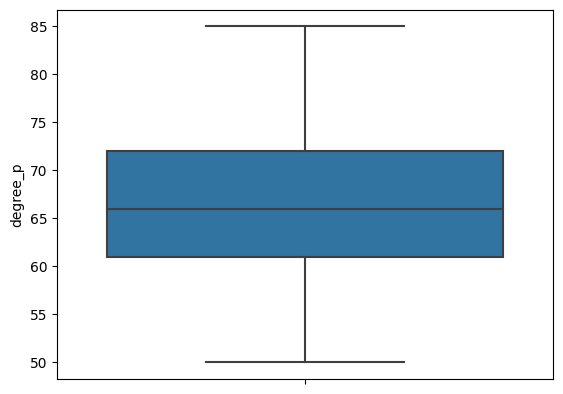

In [47]:
sns.boxplot(y='degree_p', data=df)

In [48]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [49]:
col = ['ssc_p', 'hsc_p', 'etest_p', 'mba_p', 'salary']

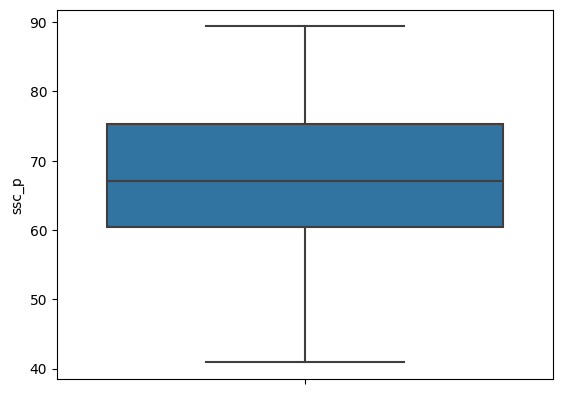

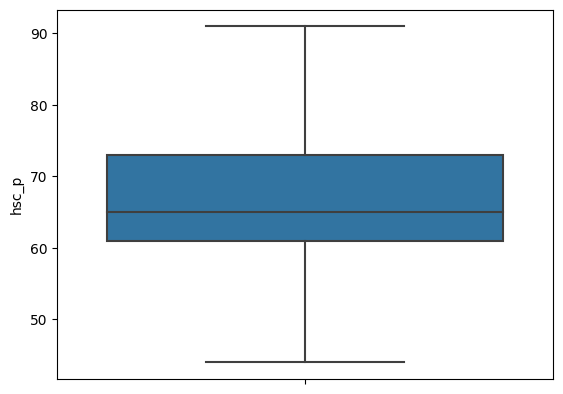

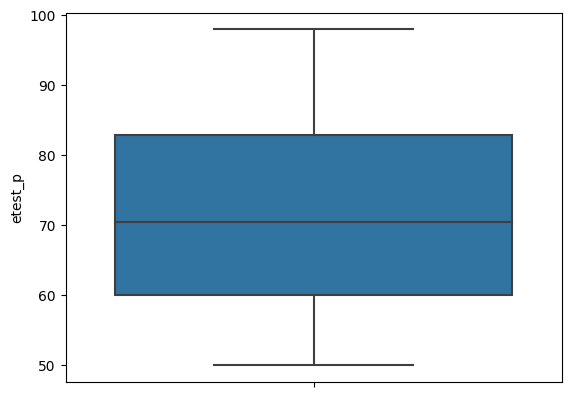

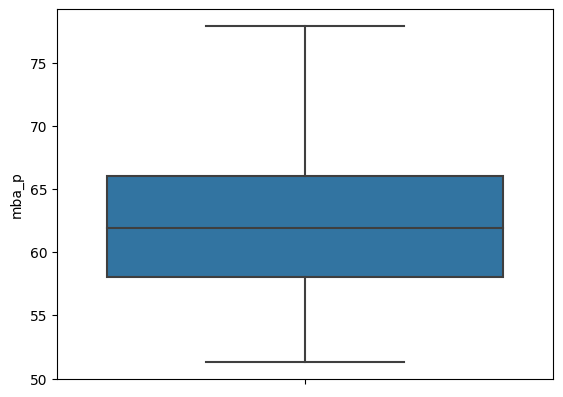

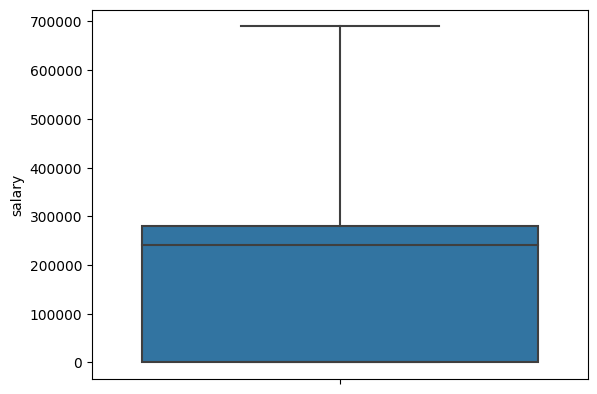

In [50]:
for c in col:
  
  Q1 = df[c].quantile(q=0.25)
  Q3 = df[c].quantile(q=0.75)
  IQR = Q3-Q1
  upper_limit = Q3 + (1.5 * IQR)
  lower_limit = Q1 - (1.5 * IQR)
  df=df[(df[c]<=upper_limit) & (df[c]>=lower_limit)]
  plt.figure()
  sns.boxplot(y=c, data=df)


Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

Fit - Finds the value & Transform - do the transform

In [54]:
df['gender']=le.fit_transform(df['gender'])

In [55]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [56]:
col=['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

In [57]:
for c in col:
  df[c]=le.fit_transform(df[c])

In [207]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,2


# **Linear Regression**

In [59]:
X = df.iloc[:,0:-2].values
X

array([[ 1.  , 67.  ,  1.  , ..., 55.  ,  1.  , 58.8 ],
       [ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [60]:
Y=df.iloc[:,-1].values
Y

array([270000., 200000., 250000.,      0., 425000.,      0.,      0.,
       252000., 231000.,      0., 260000., 250000.,      0., 218000.,
            0., 200000., 300000.,      0.,      0., 236000., 265000.,
       393000., 360000., 300000.,      0., 240000., 265000., 350000.,
            0., 250000.,      0., 278000., 260000.,      0., 300000.,
            0., 320000., 240000., 411000., 287000.,      0., 300000.,
       200000.,      0.,      0., 204000., 250000., 200000.,      0.,
            0., 450000., 216000., 220000., 240000., 360000., 268000.,
       265000., 260000., 300000., 240000.,      0., 240000.,      0.,
       275000., 275000.,      0., 275000., 360000., 240000., 240000.,
       218000., 336000.,      0., 230000., 500000., 270000.,      0.,
       240000., 300000.,      0., 300000., 300000., 400000., 220000.,
            0., 210000., 210000., 300000.,      0., 230000.,      0.,
       260000., 420000., 300000.,      0., 220000.,      0.,      0.,
       380000., 3000

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=1)

In [63]:
X_train

array([[ 1.  , 52.  ,  0.  , ..., 86.  ,  1.  , 56.09],
       [ 1.  , 52.  ,  0.  , ..., 72.  ,  1.  , 55.41],
       [ 1.  , 49.  ,  1.  , ..., 86.  ,  0.  , 62.48],
       ...,
       [ 0.  , 59.  ,  0.  , ..., 74.  ,  1.  , 67.  ],
       [ 1.  , 62.  ,  0.  , ..., 85.  ,  1.  , 55.14],
       [ 0.  , 73.  ,  1.  , ..., 53.7 ,  1.  , 56.86]])

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [65]:
X_train=sc.fit_transform(X_train)

In [66]:
X_test=sc.transform(X_test)

In [67]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [68]:
reg.fit(X_train, Y_train)

LinearRegression()

In [69]:
reg.intercept_

200042.68292682932

In [70]:
reg.coef_

array([ 22403.03650531,  57948.33026346,  21221.33417432,  22097.58528576,
       -11905.78693689,  14130.16213293,  18916.64712352, -11031.37958884,
        24514.25643255,  -9979.10636186, -17231.65970458, -20107.96668902])

In [71]:
Y_pred=reg.predict(X_test)

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
mean_squared_error(Y_test, Y_pred)

12851155711.65784

In [74]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

113362.93799852685

In [75]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.44267633217973223

# **Logistic Regression**

In [187]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,2


In [188]:
X = df.drop(['status', 'salary'], axis=1)

In [189]:
X = X.values

In [190]:
Y = df['status'].values

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [193]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [194]:
X_train=ss.fit_transform(X_train)

In [195]:
X_test=ss.transform(X_test)

In [196]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [197]:
classifier.fit(X_train, Y_train)

LogisticRegression()

In [198]:
Y_pred =classifier.predict(X_test)

# **Evaluation Metrics**

In [199]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[11,  5],
       [ 3, 22]])

In [200]:
tn, fp,fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

<Axes: >

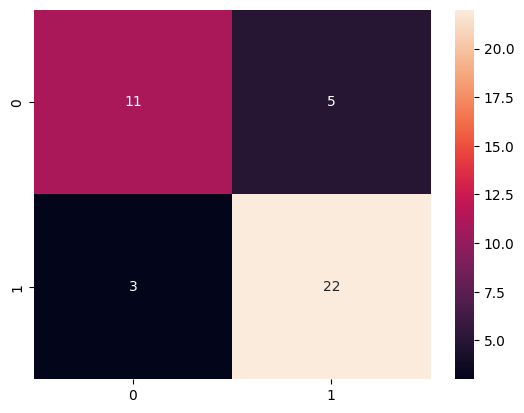

In [201]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

In [202]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)


0.8048780487804879

In [203]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

0.78375

In [204]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.81      0.88      0.85        25

    accuracy                           0.80        41
   macro avg       0.80      0.78      0.79        41
weighted avg       0.80      0.80      0.80        41



In [205]:
classifier.predict_proba(X_test)

array([[1.73833341e-02, 9.82616666e-01],
       [9.80651767e-01, 1.93482327e-02],
       [3.41065527e-01, 6.58934473e-01],
       [3.92122925e-01, 6.07877075e-01],
       [8.97131133e-02, 9.10286887e-01],
       [1.60804611e-02, 9.83919539e-01],
       [2.83749466e-02, 9.71625053e-01],
       [7.59262603e-01, 2.40737397e-01],
       [4.11817260e-01, 5.88182740e-01],
       [9.52731329e-01, 4.72686715e-02],
       [3.53136979e-05, 9.99964686e-01],
       [4.46544663e-02, 9.55345534e-01],
       [1.83607312e-02, 9.81639269e-01],
       [4.06526050e-03, 9.95934740e-01],
       [2.66044131e-02, 9.73395587e-01],
       [3.37125578e-01, 6.62874422e-01],
       [2.45890010e-01, 7.54109990e-01],
       [9.68050644e-01, 3.19493564e-02],
       [9.74067337e-04, 9.99025933e-01],
       [1.57898712e-01, 8.42101288e-01],
       [8.64575298e-01, 1.35424702e-01],
       [5.62401977e-01, 4.37598023e-01],
       [1.61246352e-03, 9.98387536e-01],
       [2.14675027e-02, 9.78532497e-01],
       [8.074500

In [206]:
Y_pred=(classifier.predict_proba(X_test)[:,1]>=0.8).astype(int)

# **Decision Tree**

In [183]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,2


In [97]:
X = df.drop(['status', 'salary'], axis=1).values

In [98]:
Y = df['status'].values

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [100]:
X_train

array([[ 1.  , 52.  ,  0.  , ..., 86.  ,  1.  , 56.09],
       [ 1.  , 52.  ,  0.  , ..., 72.  ,  1.  , 55.41],
       [ 1.  , 49.  ,  1.  , ..., 86.  ,  0.  , 62.48],
       ...,
       [ 0.  , 59.  ,  0.  , ..., 74.  ,  1.  , 67.  ],
       [ 1.  , 62.  ,  0.  , ..., 85.  ,  1.  , 55.14],
       [ 0.  , 73.  ,  1.  , ..., 53.7 ,  1.  , 56.86]])

In [101]:
from sklearn.tree import DecisionTreeClassifier
de = DecisionTreeClassifier()

In [102]:
de.fit(X_train, Y_train)

DecisionTreeClassifier()

In [103]:
Y_pred = de.predict(X_test)

In [104]:
Y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

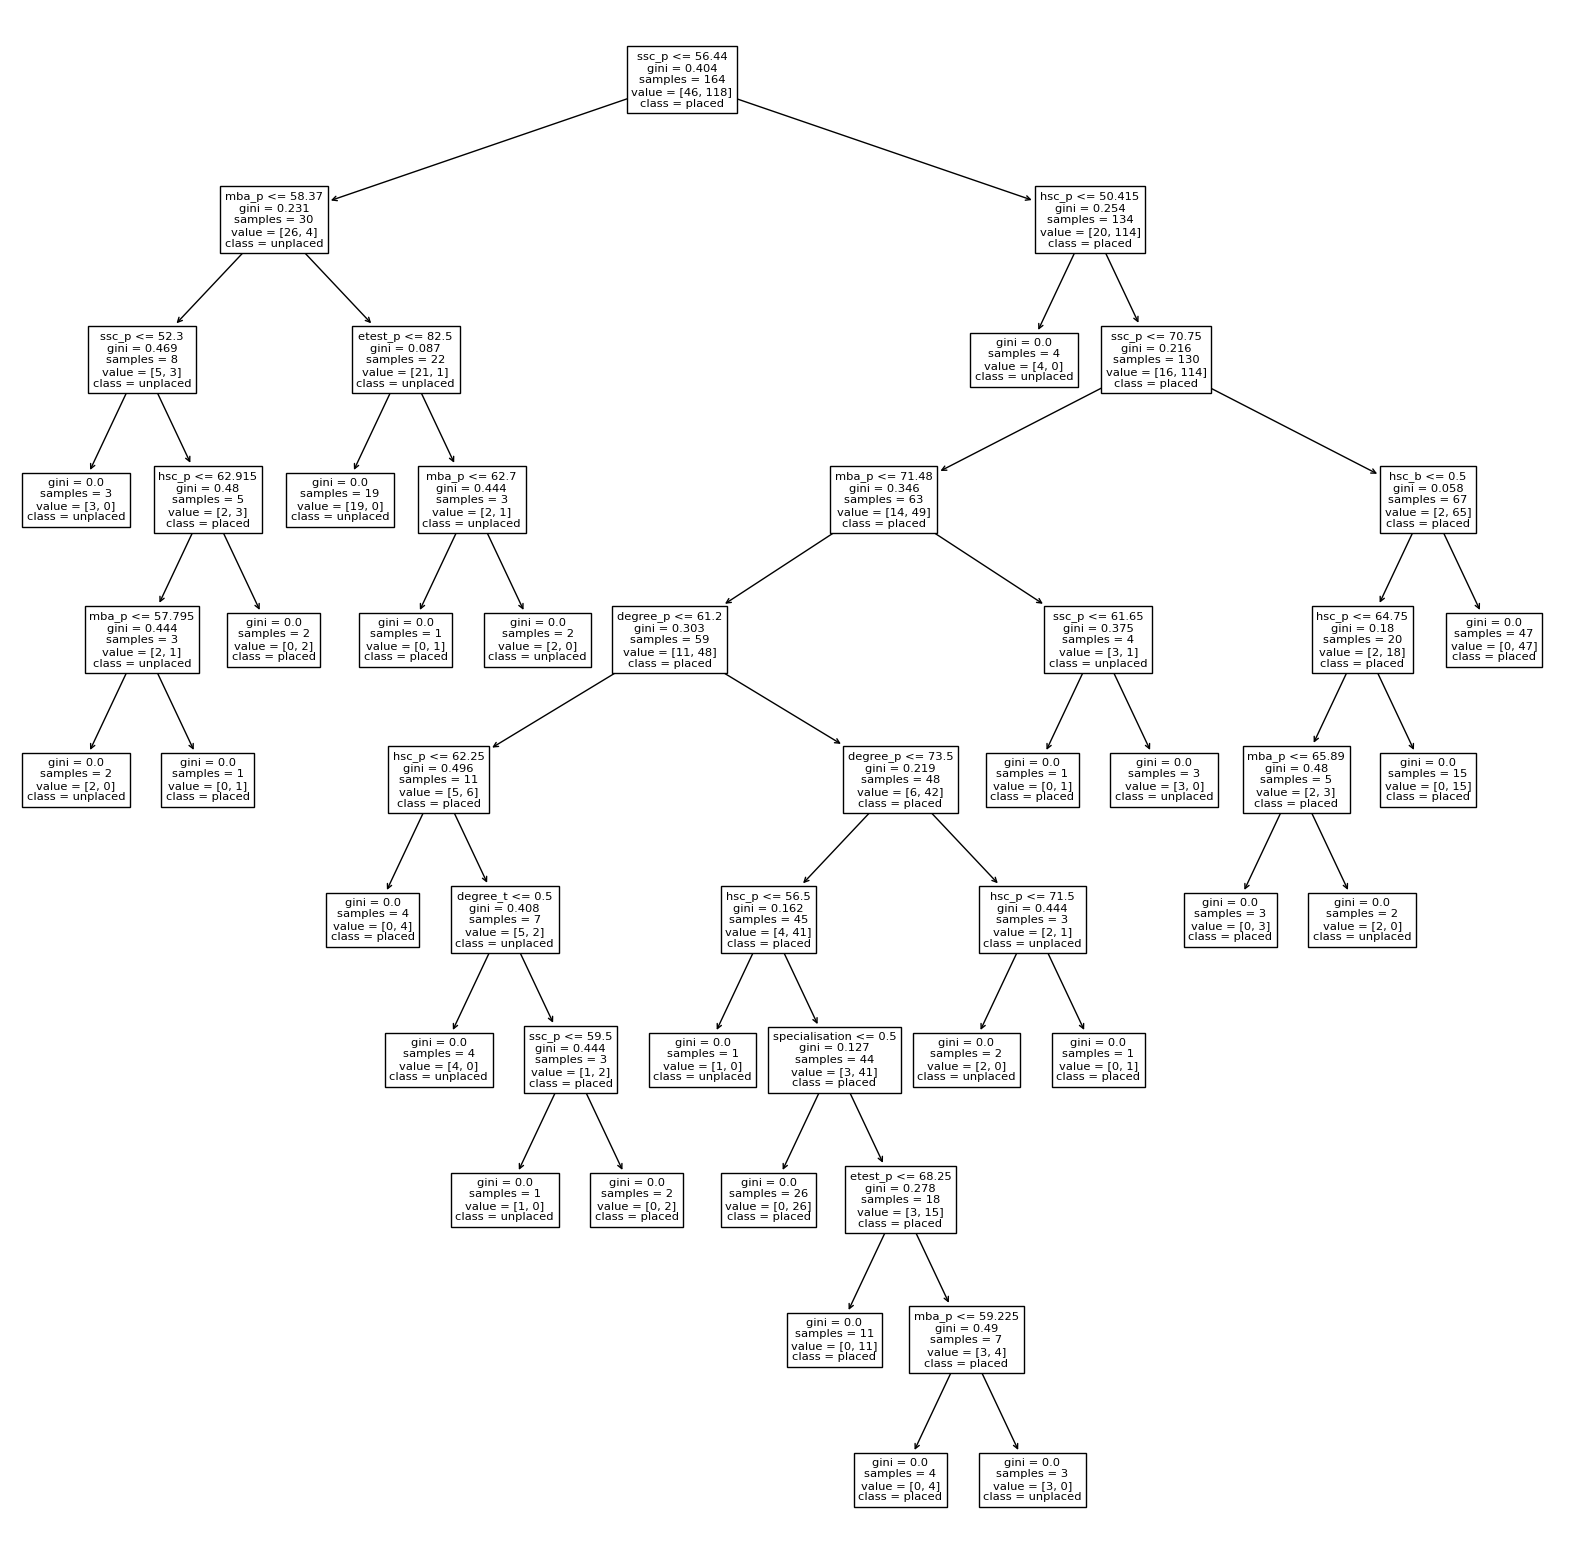

In [105]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(de,feature_names=df.columns[:-2], class_names=['unplaced','placed'])
plt.show()

In [106]:
df.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.8,1,270000.0


In [107]:
confusion_matrix(Y_test, Y_pred)

array([[ 8,  8],
       [ 8, 17]])

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)


0.6097560975609756

In [109]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        16
           1       0.68      0.68      0.68        25

    accuracy                           0.61        41
   macro avg       0.59      0.59      0.59        41
weighted avg       0.61      0.61      0.61        41



# **Random Forest**

In [110]:
X = df.drop(['status','salary'], axis=1).values

In [111]:
Y = df['status'].values

In [112]:
X_train

array([[ 1.  , 52.  ,  0.  , ..., 86.  ,  1.  , 56.09],
       [ 1.  , 52.  ,  0.  , ..., 72.  ,  1.  , 55.41],
       [ 1.  , 49.  ,  1.  , ..., 86.  ,  0.  , 62.48],
       ...,
       [ 0.  , 59.  ,  0.  , ..., 74.  ,  1.  , 67.  ],
       [ 1.  , 62.  ,  0.  , ..., 85.  ,  1.  , 55.14],
       [ 0.  , 73.  ,  1.  , ..., 53.7 ,  1.  , 56.86]])

In [113]:
Y_test

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0])

**Hyperparameter Tuning**

In [114]:
no_of_decision_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_no_of_features = ['sqrt', 'log2']
max_depth = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
criterion = ['gini', 'entropy']
min_sample_split = [1, 2, 3, 4, 5]

In [115]:
random_grid = { 'n_estimators' : no_of_decision_trees,
                'max_features' : max_no_of_features,
                'max_depth' : max_depth,
               'criterion' : criterion,
               'min_samples_split' : min_sample_split
}

In [116]:
type(random_grid)

dict

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [118]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = rf, param_distributions= random_grid, n_iter=25, cv=5, n_jobs=-1)

In [119]:
rscv.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_pa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [120]:
rscv.best_params_

{'n_estimators': 80,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy'}

In [121]:
rf_final = RandomForestClassifier(n_estimators=80, min_samples_split=4, max_features='sqrt', max_depth=13, criterion='entropy')

In [122]:
rf_final.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=13, min_samples_split=4,
                       n_estimators=80)

In [123]:
Y_pred = rf_final.predict(X_test)

In [124]:
accuracy_score(Y_test, Y_pred)

0.8292682926829268

# **Clustering**

In [182]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,2


In [168]:
from sklearn.cluster import KMeans

In [169]:
kmeans = KMeans(6)

In [170]:
kmeans.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [171]:
kmeans.predict(df)

array([0, 2, 2, 1, 3, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 3,
       3, 0, 1, 2, 0, 3, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 3, 0, 1, 0, 2, 1,
       1, 2, 2, 2, 1, 1, 5, 2, 2, 2, 3, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1,
       0, 3, 2, 2, 2, 3, 1, 2, 5, 0, 1, 2, 0, 1, 0, 0, 3, 2, 1, 2, 2, 0,
       1, 2, 1, 2, 3, 0, 1, 2, 1, 1, 3, 0, 2, 3, 1, 1, 2, 0, 1, 2, 1, 2,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 3, 0, 2, 2, 1, 2,
       2, 2, 0, 1, 2, 0, 1, 3, 2, 0, 2, 1, 4, 0, 2, 3, 2, 1, 2, 0, 1, 1,
       0, 1, 0, 5, 2, 1, 2, 1, 1, 1, 0, 0, 1, 5, 1, 2, 3, 1, 0, 1, 1, 0,
       1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0,
       1, 2, 3, 0, 0, 2, 1], dtype=int32)

In [172]:
df['clusters'] = kmeans.predict(df)

In [173]:
kmeans.inertia_

50858140773.4839

In [174]:
df['clusters'].value_counts()

2    70
1    62
0    49
3    19
5     4
4     1
Name: clusters, dtype: int64

In [175]:
inertia = []
for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(df.drop('clusters', axis=1))
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [176]:
inertia

[4142725089851.2803,
 714487534483.8364,
 252396669958.3418,
 153934019691.75497,
 80731109870.26038,
 50858140773.4839,
 29681690957.235363,
 17454965907.402668,
 9640776781.429398,
 7402363002.628788]

Text(0, 0.5, 'inertia')

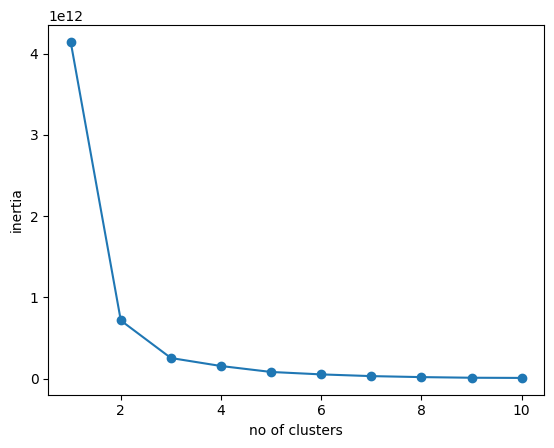

In [177]:
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('no of clusters')
plt.ylabel('inertia')

# **PCA**

In [179]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,2


In [139]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [140]:
df_new = ss.fit_transform(df)

In [141]:
from sklearn.decomposition import PCA

In [142]:
pca = PCA(n_components=6)

In [143]:
array_pca = pca.fit_transform(df_new)

In [144]:
pca.explained_variance_ratio_

array([0.25526854, 0.13416107, 0.11079898, 0.10730581, 0.07694754,
       0.07073028])

In [145]:
pd.DataFrame(data=array_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.387288,-0.605546,-1.121687,0.399720,1.581950,-0.487656
1,-2.804108,-1.089236,0.823048,0.615962,-1.630831,0.272482
2,0.153753,2.816515,-0.965710,0.647699,-0.387004,-0.575046
3,3.434872,-1.306559,1.155684,2.022148,-0.652757,-0.300884
4,-2.302775,1.904353,-0.262925,1.155543,-0.715036,-2.040421
...,...,...,...,...,...,...
200,-3.407317,0.450408,-0.389969,-2.059575,-0.644378,-1.245666
201,-0.334798,-1.928133,-1.401840,0.827622,-0.024547,-0.833632
202,-1.480161,0.085744,-1.371802,-1.087643,0.037431,1.762883
203,0.371510,-0.140886,-0.546550,-1.173994,1.749765,-0.465209


# Linear Regression after PCA

In [180]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,2


In [147]:
df_1 = df.drop(['salary', 'status'], axis=1)

In [148]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [149]:
X_standardized = ss.fit_transform(df_1) 

In [150]:
from sklearn.decomposition import PCA


In [151]:
pca = PCA(n_components=6)

In [152]:
pca1 = pca.fit_transform(X_standardized)

In [153]:
pca.explained_variance_ratio_

array([0.21947054, 0.15500747, 0.12742944, 0.10788402, 0.08251926,
       0.06911226])

In [154]:
df_pca = pd.DataFrame(pca1, columns= ['PC1','PC2','PC3','PC4','PC5','PC6'])

In [155]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.287210,-0.831507,-0.539787,0.006943,-0.509579,2.535080
1,3.143575,-0.744116,0.893959,-1.524867,0.286706,0.009255
2,-1.086855,2.545503,-0.367923,-1.108241,-0.572855,-0.144402
3,-2.627753,-1.501712,2.246826,-0.573975,-0.292864,-0.594999
4,1.292063,1.898734,0.431068,-1.593980,-2.037259,-0.123703
...,...,...,...,...,...,...
200,3.246891,0.870931,-1.734119,0.246104,-1.239791,-0.117675
201,-0.243610,-2.177042,-0.485484,-0.931781,-0.834359,-0.130949
202,1.067284,0.111831,-1.776203,-0.150174,1.760571,0.483116
203,-0.729156,-0.264678,-1.061094,1.752442,-0.479904,0.289525


In [156]:
df.reset_index()['salary']

0      270000.0
1      200000.0
2      250000.0
3           0.0
4      425000.0
         ...   
200    400000.0
201    275000.0
202    295000.0
203    204000.0
204         0.0
Name: salary, Length: 205, dtype: float64

In [157]:
df_pca = pd.concat([df_pca, df.reset_index()['salary']], axis=1)

In [158]:
X = df_pca.drop('salary', axis=1).values

In [159]:
Y = df['salary'].values

In [160]:
Y

array([270000., 200000., 250000.,      0., 425000.,      0.,      0.,
       252000., 231000.,      0., 260000., 250000.,      0., 218000.,
            0., 200000., 300000.,      0.,      0., 236000., 265000.,
       393000., 360000., 300000.,      0., 240000., 265000., 350000.,
            0., 250000.,      0., 278000., 260000.,      0., 300000.,
            0., 320000., 240000., 411000., 287000.,      0., 300000.,
       200000.,      0.,      0., 204000., 250000., 200000.,      0.,
            0., 450000., 216000., 220000., 240000., 360000., 268000.,
       265000., 260000., 300000., 240000.,      0., 240000.,      0.,
       275000., 275000.,      0., 275000., 360000., 240000., 240000.,
       218000., 336000.,      0., 230000., 500000., 270000.,      0.,
       240000., 300000.,      0., 300000., 300000., 400000., 220000.,
            0., 210000., 210000., 300000.,      0., 230000.,      0.,
       260000., 420000., 300000.,      0., 220000.,      0.,      0.,
       380000., 3000

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [181]:
from sklearn.metrics import r2_score
reg=LinearRegression()
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)
r2_score(Y_test,Y_pred)

0.440817540434157